# Introduction

JamAutos, is a small automobile company based in Jamaica and ships its imports and exports vehicles worldwide. It is looking to expand it's market to America and would like to analyze the market so they can serve their new customers better.

We have been tasked to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Jamaican market. 


# Data Processing

In [1]:
#import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [6]:
#load dataframe
cars_df = pd.read_csv('CarPrice_dataset.csv')
#view the dataset
cars_df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
#let's get a summary of the dataframe
cars_df.shape

(205, 26)

In [8]:
#let's check for each column data type and ensure that everything is okay
cars_df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [9]:
#Let's look at all the unique car names to ensure that they are okay.
cars_df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [10]:
#Let's create an extra column for the car name and the car model.
cars_df[['car_brand', 'car_model']] = cars_df['CarName'].str.split(' ', 1, expand=True)
cars_df.head()
cars_df['car_brand'].unique()

C:\Users\prathamesh\AppData\Local\Temp\ipykernel_20576\559561830.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  cars_df[['car_brand', 'car_model']] = cars_df['CarName'].str.split(' ', 1, expand=True)


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [12]:
#We can spot some errors in the spellings of some of the car brand names! Let's fix the spellings
cars_df['car_brand'] = cars_df['car_brand'].replace(to_replace=['maxda', 'Nissan', 'porschce', 'toyouta', 'vokswagen', 'vw'],
                                                    value=['mazda', 'nissan', 'porsche', 'toyota', 'volkswagen','volkswagen' ])
cars_df['car_brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [13]:
#let's check for missing data values.
cars_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
car_brand           0
car_model           2
dtype: int64

It seems we have two missing values in Car Model, we will remove them.

In [14]:
cars_df.dropna(inplace = True)

In [10]:
cars_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
car_brand           0
car_model           0
dtype: int64

In [15]:
cars_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.00000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,102.630542,0.832512,98.789163,174.143842,65.922660,53.731034,2560.078818,127.147783,3.326897,3.262857,10.15133,104.399015,5127.832512,25.157635,30.694581,13347.200330
std,59.497287,1.247384,6.039964,12.338152,2.148216,2.454068,521.221484,41.773527,0.270629,0.305642,3.99058,39.631013,478.525201,6.544197,6.896356,7995.739861
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.00000,48.000000,4150.000000,13.000000,16.000000,5151.000000
25%,51.500000,0.000000,94.500000,166.550000,64.100000,52.000000,2179.500000,97.500000,3.150000,3.110000,8.55000,70.000000,4800.000000,19.000000,25.000000,7847.000000
50%,102.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2420.000000,120.000000,3.310000,3.290000,9.00000,95.000000,5200.000000,24.000000,30.000000,10345.000000
75%,154.500000,2.000000,102.400000,183.300000,66.900000,55.500000,2943.500000,143.000000,3.580000,3.410000,9.40000,116.000000,5500.000000,30.000000,34.000000,16509.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.00000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [16]:
cars_df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'car_brand', 'car_model'],
      dtype='object')

# Analysis

C:\Users\prathamesh\AppData\Local\Temp\ipykernel_20576\1453826092.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_df.price)


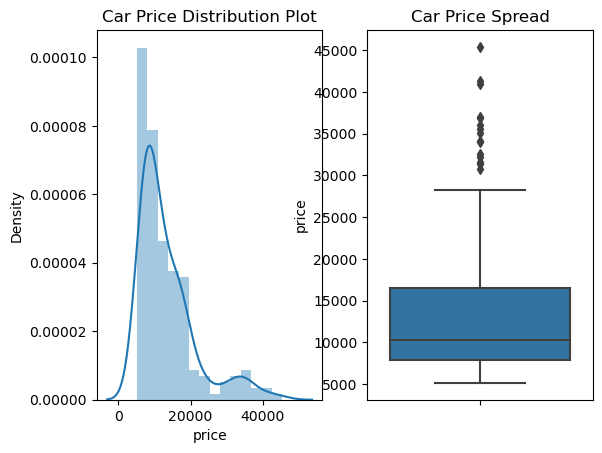

In [17]:
#Lets look at how the price of the cars is distributed
plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars_df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars_df.price)

plt.show()

The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
There is a significant difference between the mean and the median of the price distribution.
The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

Since we are focusing on the price of the cars, what we will do is to cluster the prices of each car and look at the distribution and count of them. Our min price 5118, and our max price is 45500.

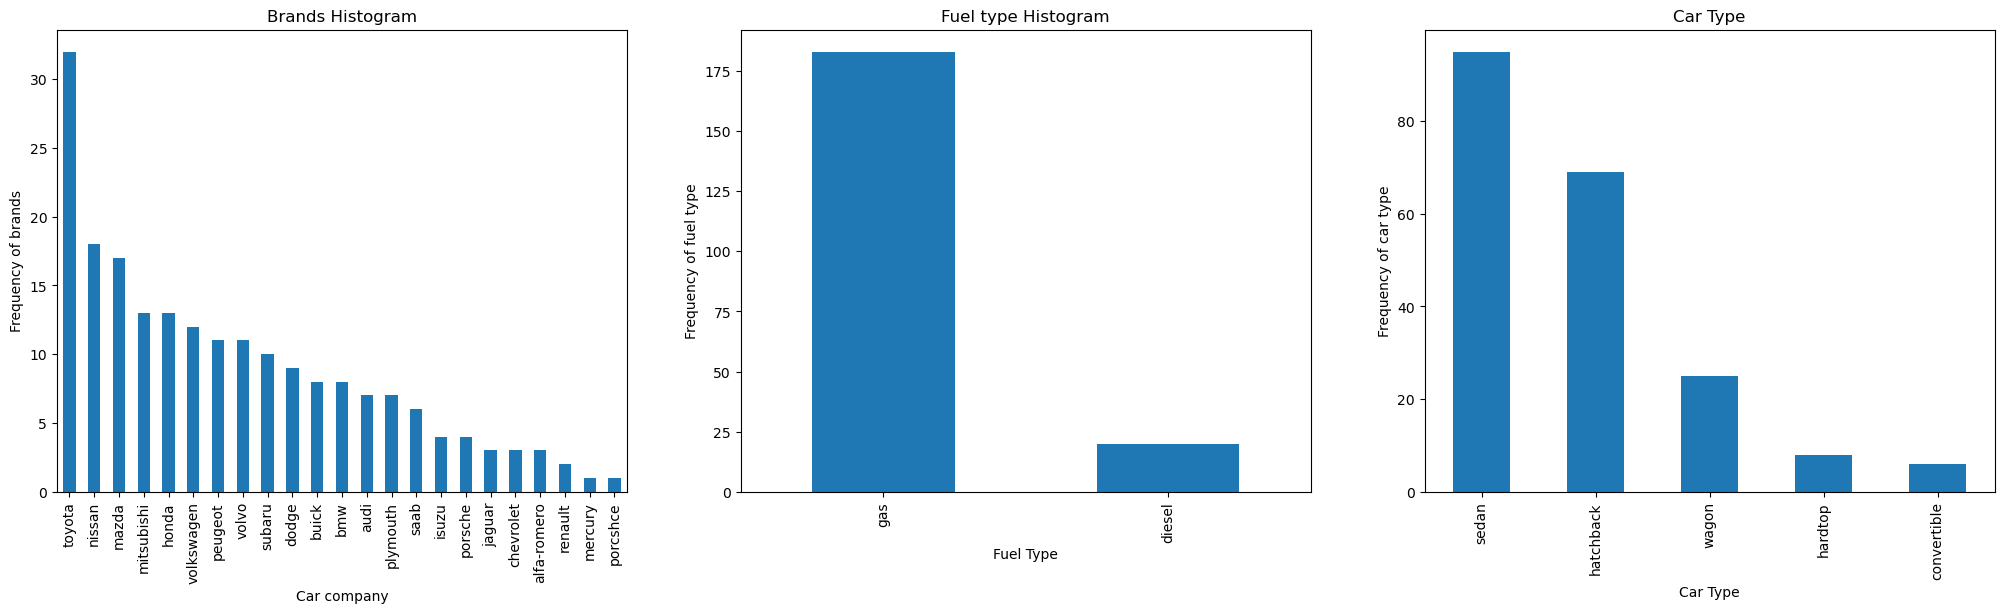

In [18]:
plt.figure(figsize=(25, 6))
#bar plot for car brands
plt.subplot(1,3,1)
plt1 = cars_df.car_brand.value_counts().plot.bar()
plt.title('Brands Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of brands')

#bar plot for fuel types
plt.subplot(1,3,2)
plt1 = cars_df.fueltype.value_counts().plot.bar()
plt1.set_title('Fuel type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')


#histogram for car type
plt.subplot(1,3,3)
plt1 = cars_df.carbody.value_counts().plot.bar()
plt1.set_title('Car Type')
plt1.set(xlabel ='Car Type', ylabel= 'Frequency of car type')

plt.show()

Here we can see that the most prefered cars for consumers are toyota vehicles. With Porsche, being the least purchased vehicle.
A signig=ficant amount of consumers fuel type is gas, with only 25% of consumers using diesel.
Most consumers pre

Let's look at the brands, fuel type and car type versus their average prices.

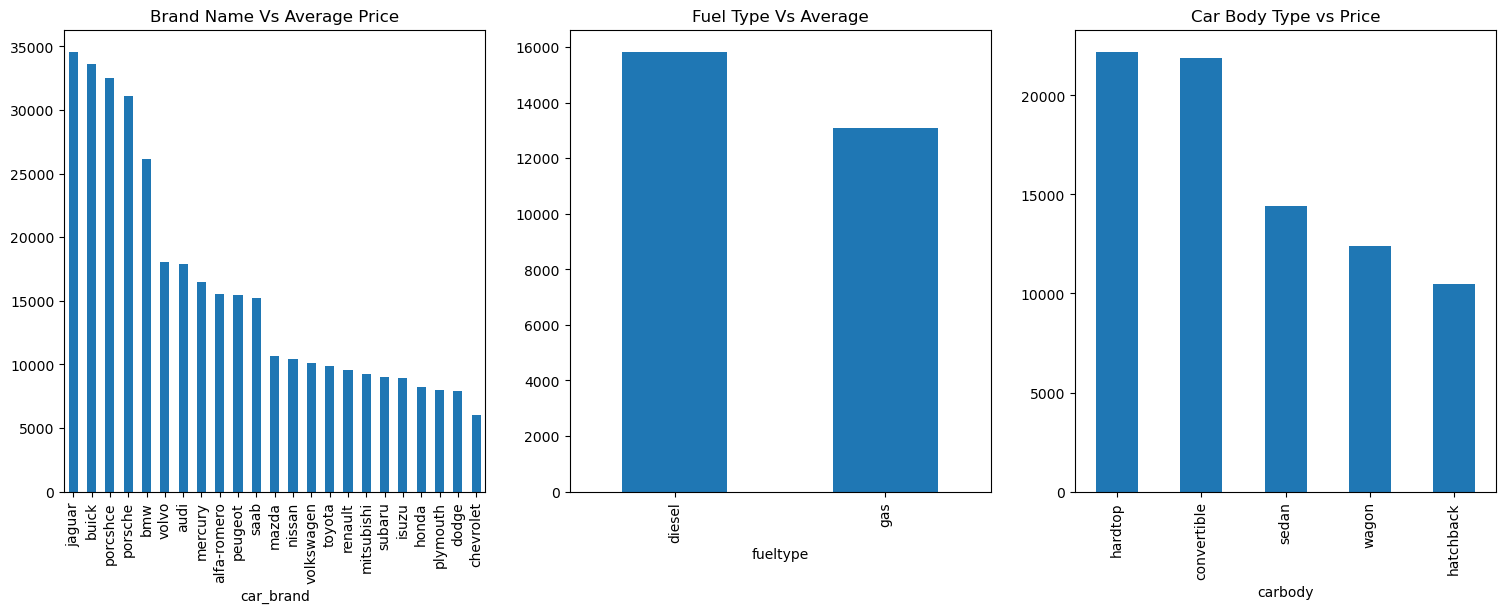

In [19]:
plt.figure(figsize=(25, 6))

#car brand vs price
brand_avg = cars_df.groupby('car_brand')['price'].mean().sort_values(ascending = False)
plt.subplot(1,4,1)
brand_avg.plot.bar()
plt.title('Brand Name Vs Average Price')

#fuel type vs price
plt.subplot(1,4,2)
fuel_avg = cars_df.groupby('fueltype')['price'].mean().sort_values(ascending = False)
fuel_avg.plot.bar()
plt.title('Fuel Type Vs Average')

#Body type vs price
plt.subplot(1,4,3)
type_avg = cars_df.groupby('carbody')['price'].mean().sort_values(ascending = False)
type_avg.plot.bar()
plt.title('Car Body Type vs Price')

plt.show()


Jaguars on average, are the most expensive cars, with a price mark at about USD 34,600. With the least expensive car being the Chevrolet, coming in at about USD 6000.00
The average price for a diesel car is much more expensive when compared to gas. With a difference of USD 2838.30. 
The most expensive car body type is the hard top, which comes in at around USD 22,200 , on average and the least expensive being the hatchback, coming at half the price of a hard top of around USD 10,400.


In [20]:
print(brand_avg)

car_brand
jaguar         34600.000000
buick          33647.000000
porcshce       32528.000000
porsche        31118.625000
bmw            26118.750000
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
subaru          9025.100000
isuzu           8916.500000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64


In [21]:
print(fuel_avg)
15838.1500 - 12999.7982

fueltype
diesel    15838.150000
gas       13074.965393
Name: price, dtype: float64


2838.3518000000004

In [24]:
print(type_avg)


carbody
hardtop        22208.500000
convertible    21890.500000
sedan          14420.252632
wagon          12371.960000
hatchback      10452.864739
Name: price, dtype: float64


# Correlation

Let's look at the correlation between each variable and price, as we will need to find out what factors could possible affect the price of a vehicle.

C:\Users\prathamesh\AppData\Local\Temp\ipykernel_20576\1111495022.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cars_df.corr(),cmap="OrRd",annot=True)


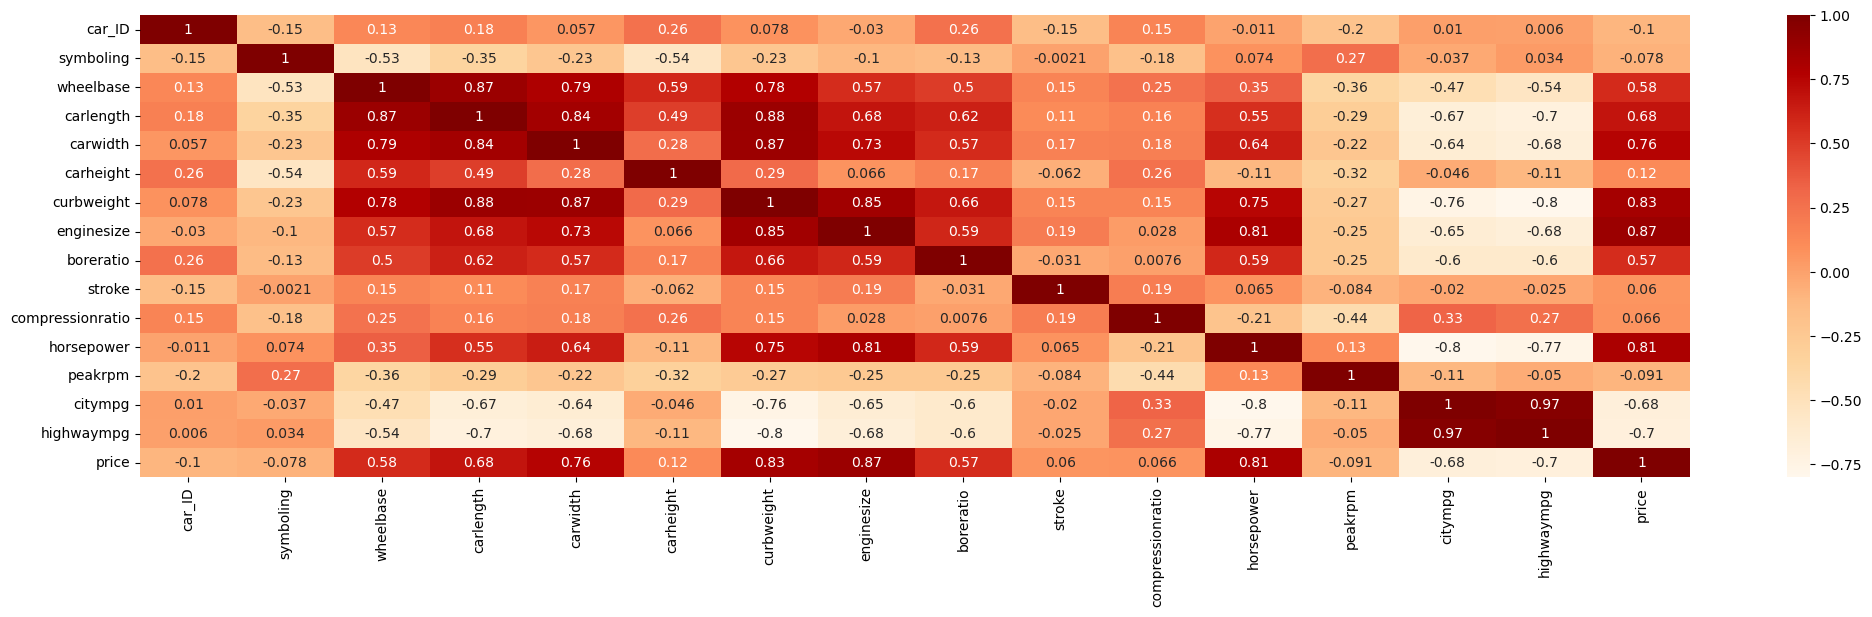

In [23]:
    plt.figure(figsize=(25, 6))
    sns.heatmap(cars_df.corr(),cmap="OrRd",annot=True)
    plt.show()


Here we can see that curb weight - 0.84
engine size - 0.87
horse power - 0.81
curbweight - 0.84
car width - 0.76
car length - 0.68
wheel base- 0.58

<AxesSubplot: xlabel='carlength', ylabel='price'>

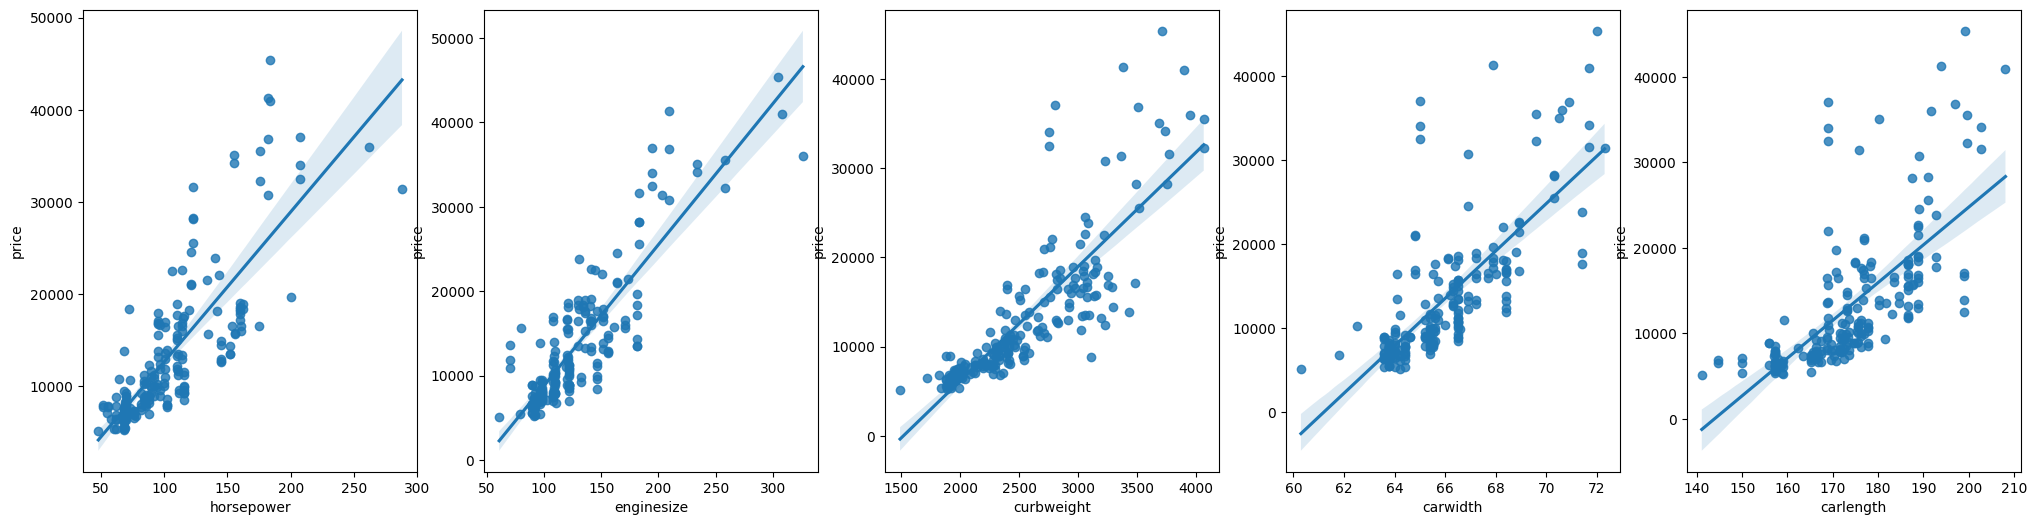

In [20]:
#regression plot
plt.figure(figsize=(25, 6))
#horspower vs price
plt.subplot(1,5,1)
sns.regplot(x= 'horsepower', y='price', data=cars_df)

#enginesize vs price
plt.subplot(1,5,2)
sns.regplot(x='enginesize', y = 'price', data=cars_df)

#curbweight vs price
plt.subplot(1,5,3)
sns.regplot(x='curbweight', y = 'price', data=cars_df)

##car width vs price
plt.subplot(1,5,4)
sns.regplot(x='carwidth', y = 'price', data=cars_df)

##car length vs price
plt.subplot(1,5,5)
sns.regplot(x='carlength', y = 'price', data=cars_df)

Here we can see that as horsepower, engine size, curb weight, car width and car length increases, the price of the vehicle increases.  There is a positive relationship between price and the above variables. But how strong was it?

Let's also take a look for negative relationships.

<Axes: xlabel='peakrpm', ylabel='price'>

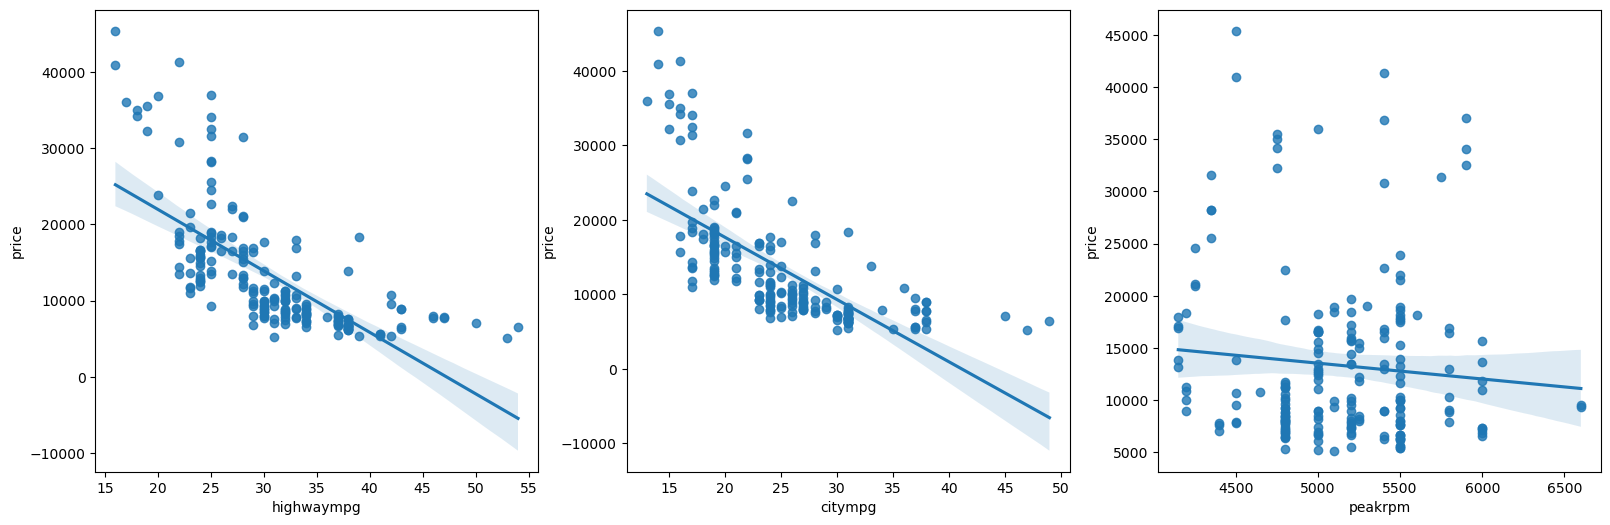

In [25]:
plt.figure(figsize=(40, 6))
plt.subplot(1,6,1)
sns.regplot(x= 'highwaympg', y='price', data=cars_df)

plt.subplot(1,6,2)
sns.regplot(x= 'citympg', y='price', data=cars_df)

plt.subplot(1,6,3)
sns.regplot(x= 'peakrpm', y='price', data=cars_df)

Here we can see that there is a negative relationship between highway mpg and city mpg when compared to price. As the highway and city mpg increases, the price of the vehicle decreases. Let's do a p test to observe the statistical significance of the above relationships.

In [26]:
horsepower_p_value = pearsonr(cars_df['horsepower'], cars_df['price'])
enginesize_p_value = pearsonr(cars_df['enginesize'], cars_df['price'])
curbweight_p_value = pearsonr(cars_df['curbweight'], cars_df['price'])
carwidth_p_value = pearsonr(cars_df['carwidth'], cars_df['price'])
highway_p_value = pearsonr(cars_df['highwaympg'], cars_df['price'])
city_p_value = pearsonr(cars_df['citympg'], cars_df['price'])
peak_p_value = pearsonr(cars_df['peakrpm'], cars_df['price'])

In [27]:
p_value_t = pd.DataFrame({'Horsepower': horsepower_p_value, 'Engine_Size': enginesize_p_value, 'Curb_Weight': curbweight_p_value, 'Car_width': carwidth_p_value, 
                        'Highway_Mpg': highway_p_value, 'City_mpg': city_p_value, 'Peak-rpm': peak_p_value })

In [29]:
p_value_t

,Horsepower,Engine_Size,Curb_Weight,Car_width,Highway_Mpg,City_mpg,Peak-rpm
0,8.069859e-01,8.738856e-01,8.339972e-01,7.582502e-01,-6.955195e-01,-6.832358e-01,-0.090774
1,7.369602e-48,7.001855e-65,8.334258e-54,3.367612e-39,1.116609e-30,2.913205e-29,0.197743


Here we can see that Horsepower, Enginse size, curb weight, car wifth, highway mp as well as city mpg all have a p-test value lower than 0.01, which indicates that the observed correlation is statistically significant. As for peak rpm,the correlation coefficient is not statistically significant so we cannot conclude that there is a significant correlation between the variables, peak-rpm and price.

# Models

We will be using the following models for the prediction of car prices:
* Linear Regression
* Polynomial Regression
* Decision Tree
* Random Forest


After, we will evaluate how well each model perform using it's r-squared valye.

In [30]:
#linear model #1
car_features = ['horsepower', 'enginesize', 'curbweight', 'carwidth', 'carlength', 'highwaympg', 'citympg']
X = cars_df[car_features]
y = cars_df.price
train_X, val_X, train_y, val_y = train_test_split(X,y, random_state = 0)

#we will be use a pipeline for this multiple linear regression model
Input = [('scaler', StandardScaler()),('mode', LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(train_X, train_y)
pipe_y = pipe.predict(val_X)
linear = pipe.score(val_X, val_y)

In [31]:
#polynomial model using ridge
Input_poly = [('scaler', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2, include_bias=False)),('model', Ridge(alpha=0.1))]
pipe_poly = Pipeline(Input_poly)
pipe_poly.fit(train_X, train_y)
polynomial = pipe_poly.score(val_X, val_y)
polynomial_predict = pipe_poly.predict(val_X)

#let's make the predictions for later to see if
poly_predict_output = pd.DataFrame({ 'Horsepower':val_X.horsepower,'Enginesize':val_X.enginesize,'Curbweight':val_X.curbweight,
    'SalePrice': polynomial_predict
})


For our decision tree and random forest models, we will be using the following variables to predict the car prices. 
* Car Brand
* Model
* Fuel Type 
* HighWay mpg
* City mpg
As we have seen a trend in the prices of cars, where customers are likely to pay more or less based on the brand name of the car, the model and the fuel type. We also see where customers will also pay less or more if the car is used, if the car has a higher highwaympg or city mpg, customers are likely to pay less.

In [34]:
car_brand2 = pd.get_dummies(cars_df['car_brand'], drop_first=True)
car_model2 = pd.get_dummies(cars_df['car_model'], drop_first=True)
fuel_type2 = pd.get_dummies(cars_df['fueltype'], drop_first=True)
X1 = pd.concat([car_brand2, car_model2, fuel_type2, cars_df[['highwaympg', 'citympg']]], axis=1)
y1 = cars_df['price']
train_X, val_X, train_y, val_y = train_test_split(X1, y1, random_state=0)

Input = [('scaler', StandardScaler()), ('model', DecisionTreeRegressor())]
pipe = Pipeline(Input)
pipe.fit(train_X, train_y)
decision_tree = pipe.score(val_X, val_y)
decision_tree_predict = pipe.predict(val_X)

# Create a DataFrame with predicted output, including car model, highwaympg, and citympg
decision_tree_predict_output = pd.DataFrame({'Car_Brand': car_brand2.columns[val_X.iloc[:, 0].values],
                                             'Car_Model': car_model2.columns[val_X.iloc[:, 0].values],
                                              #'Fuel_Type': fuel_type2.columns[val_X.iloc[:,0].values],
                                             'Highway_mpg': val_X.iloc[:, -2],
                                             'City_mpg': val_X.iloc[:, -1],
                                             'Sales_Price': decision_tree_predict})



In [35]:
#random_forestmodel 
Input2 = [('scaler', StandardScaler()), ('model', RandomForestRegressor())]
pipe2 = Pipeline(Input2)
pipe2.fit(train_X, train_y)
random_forest= pipe2.score(val_X, val_y)
random_forest_prediction = pipe2.predict(val_X)

# Create a DataFrame with predicted output, including car model, highwaympg, and citympg
random_forest_predict_output = pd.DataFrame({'Car_Brand': car_brand2.columns[val_X.iloc[:, 0].values],
                                             'Car_Model': car_model2.columns[val_X.iloc[:, 0].values],
                                             'Highway_mpg': val_X.iloc[:, -2],
                                             'City_mpg': val_X.iloc[:, -1],
                                             'Sales_Price': random_forest_prediction})



# Model Evaluation

We will be using R squared score to evaluate the performance of each model. 

In [37]:
rscore_results = pd.DataFrame({'Linear': linear, 'Polynomial': polynomial, 'DecisionTree' : decision_tree, 'RandomForest': random_forest}, index = [0])
rscore_results

,Linear,Polynomial,DecisionTree,RandomForest
0,0.80754,0.84728,0.791396,0.820684


Here we can see that the most accurate model is the Polynomial model. With about 85% of its variable accounted for, and the Random Forest has 84% of its variables accounted for. Let's take a look at the model predictions and compare them to see if they make sense.

In [38]:
random_forest_predict_output.head()

,Car_Brand,Car_Model,Highway_mpg,City_mpg,Sales_Price
18,audi,100ls,53,47,6896.116667
45,audi,100ls,43,38,6302.936667
33,audi,100ls,34,30,7303.860000
37,audi,100ls,33,27,9606.036667
109,audi,100ls,24,19,15173.889643


This random forest model makes alot of  sense, price range for the models and car models falls into place, and as the highwaympg and citympg increases, the price of the car decreases. This is something an average customer will consider when purchasing a car.

In [39]:
poly_predict_output.head()

,Horsepower,Enginesize,Curbweight,SalePrice
18,48,61,1488,11408.888426
45,70,90,1909,5713.920963
33,76,92,1940,5574.785651
37,86,110,2236,7776.735472
109,97,120,3230,15619.390601


This Polynomial regression also makes sense, as the horsepower, enginesize and curb weight of the vehicle increases, so does the price. But it is not something an average consumer will think about when purchasing a car. Sure, they want a fast car... but the average consumer's first concern when purchasing a car would not be horsepower and enginesize.


# Conclusion
We will use the random forest model to predict prices. Though horsepower, enginesize and curbweight have a significant impact on Sales Price. It is better to predict the Sales price of a vehicle using the car brand, car model and mpg. Consumers are more likely to make an informed decision on their purchase based on the above variables.